# <span style="color:#2E86C1;">Portfolio VaR & ES Analysis: Project Overview</span>

---

## <span style="color:#117A65;">Objective</span>
Estimate and compare the Value at Risk (VaR) and Expected Shortfall (ES) of a diversified portfolio using:
- <span style="color:#B9770E;">Historical Simulation</span>
- <span style="color:#B9770E;">Parametric (Variance-Covariance)</span>
- <span style="color:#B9770E;">Monte Carlo Simulation</span>

**Data Source:**
- Yahoo Finance: Apple (AAPL), Microsoft (MSFT), Google (GOOG)

---

## <span style="color:#117A65;">Methods Overview</span>
1. <span style="color:#B9770E;">Historical Simulation</span>: Non-parametric, uses actual returns.
2. <span style="color:#B9770E;">Parametric</span>: Assumes normality, uses mean & std deviation.
3. <span style="color:#B9770E;">Monte Carlo</span>: Simulates returns using estimated parameters.



**For details, see the code and results below.**

🛠️ Python Implementation
### 1. Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
from IPython.display import display, Markdown


### 2. Data Acquisition and Preparation
We'll fetch historical stock data for a portfolio consisting of Apple (AAPL), Microsoft (MSFT), and Google (GOOG) from Yahoo Finance.

In [19]:
# Define tickers and date range
tickers = ['AAPL', 'GOOG', 'MSFT']
start_date = '2020-01-01'

# Download data (MultiIndex by default)
data = yf.download(tickers, start=start_date)

# Extract only 'Close' prices from the MultiIndex columns
close_prices = data['Close']  # Now a DataFrame with tickers as columns

# Set end_date to the latest available date in the data
data_dates = close_prices.index
end_date = str(data_dates[-1].date())

# Drop any rows with missing values
close_prices.dropna(inplace=True)

# Calculate daily returns
returns = close_prices.pct_change().fillna(0)  # Fill NaN values with 0 for the first row

# Display the last few rows of data
print("Last few rows of daily returns:")
print(returns.tail())



[*********************100%***********************]  3 of 3 completed

Last few rows of daily returns:
Ticker          AAPL      GOOG      MSFT
Date                                    
2025-05-05 -0.031459  0.001447  0.002045
2025-05-06 -0.001911 -0.005119 -0.006557
2025-05-07 -0.011385 -0.075060  0.000092
2025-05-08  0.006318  0.019306  0.011123
2025-05-09  0.005266 -0.008796  0.001278



C:\Users\HP\AppData\Local\Temp\ipykernel_5512\2059972314.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices.dropna(inplace=True)


### Step3. Portfolio Construction
We assign equal weights to the three stocks in the portfolio.

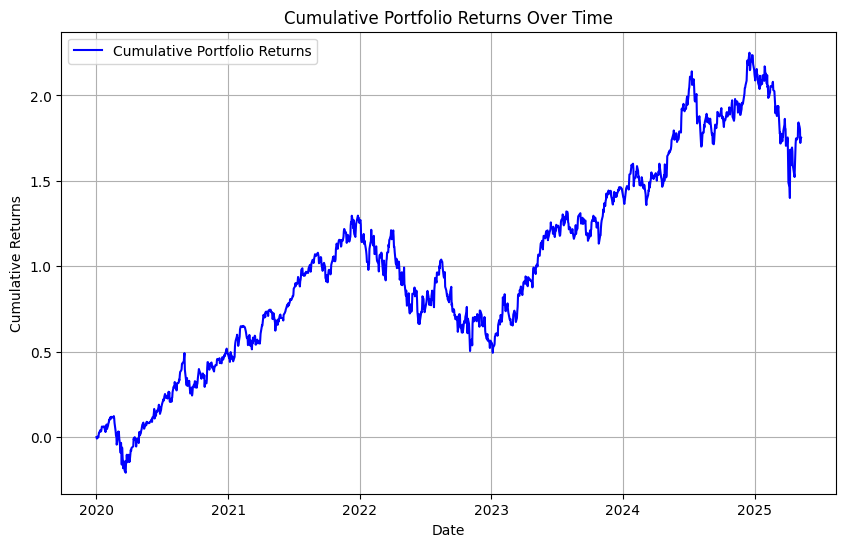

In [20]:
# Define portfolio weights (equal weight in this example)
weights = np.array([1/3, 1/3, 1/3])

# Compute portfolio returns
portfolio_returns = returns.dot(weights)

# plot the cumulative portfolio returns
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Cumulative Portfolio Returns', color='blue')
plt.title('Cumulative Portfolio Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()

### 4. Value at Risk (VaR) and Expected Shortfall (ES) Calculations <br>
a. Historical Simulation



In [21]:
# Confidence Interval
confidence_level = 0.95

# Calculate VaR and ES using the historical method
var_hist = np.percentile(portfolio_returns, (1 - confidence_level) * 100)
es_hist = portfolio_returns[portfolio_returns < var_hist].mean()
print("Historical VaR (95%):", round(var_hist, 4))
print("Historical ES (95%):", round(es_hist, 4))


Historical VaR (95%): -0.0276
Historical ES (95%): -0.0407


b. Parametric Method (Variance-Covariance)



In [22]:
# Calculate mean and standard deviation of portfolio returns
mean_return = portfolio_returns.mean()
std_return = portfolio_returns.std()

# Calculate the z-score for the given confidence level
z_score = norm.ppf(1 - confidence_level)

# Parametric VaR (Variance-Covariance method)
var_param = mean_return + z_score * std_return

# Parametric ES (Expected Shortfall)
es_param = mean_return - std_return * norm.pdf(z_score) / (1 - confidence_level)

# Print the results
print(f"Parametric VaR (95%): {var_param:.4f}")
print(f"Parametric ES (95%): {es_param:.4f}")


Parametric VaR (95%): -0.0288
Parametric ES (95%): -0.0364


c. Monte Carlo Simulation


In [23]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of Monte Carlo simulations
simulations = 100000

# Simulate portfolio returns using normal distribution with estimated mean and std
simulated_returns = np.random.normal(mean_return, std_return, simulations)

# Calculate Monte Carlo VaR at the given confidence level
var_mc = np.percentile(simulated_returns, (1 - confidence_level) * 100)

# Calculate Monte Carlo ES (average of losses beyond VaR)
es_mc = simulated_returns[simulated_returns < var_mc].mean()

# Print the results
print(f"Monte Carlo VaR (95%): {var_mc:.4f}")
print(f"Monte Carlo ES (95%): {es_mc:.4f}")


Monte Carlo VaR (95%): -0.0288
Monte Carlo ES (95%): -0.0364


### 5. Results Summary & Visualization

In [24]:

# Create a summary table
summary_df = pd.DataFrame({
    'Method': ['Historical', 'Parametric', 'Monte Carlo'],
    'VaR (95%)': [var_hist, var_param, var_mc],
    'ES (95%)': [es_hist, es_param, es_mc]
})

# Format the numbers for better readability
summary_df['VaR (95%)'] = summary_df['VaR (95%)'].apply(lambda x: f"{x:.4f}")
summary_df['ES (95%)'] = summary_df['ES (95%)'].apply(lambda x: f"{x:.4f}")

print(summary_df.to_string(index=False))


     Method VaR (95%) ES (95%)
 Historical   -0.0276  -0.0407
 Parametric   -0.0288  -0.0364
Monte Carlo   -0.0288  -0.0364


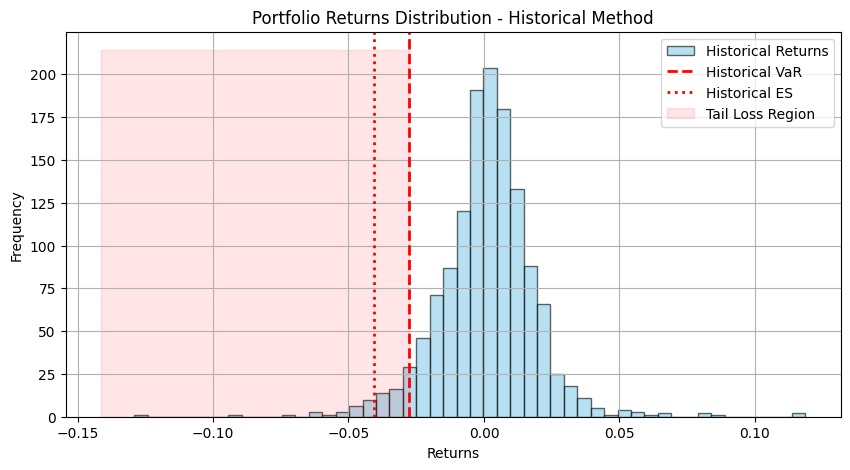

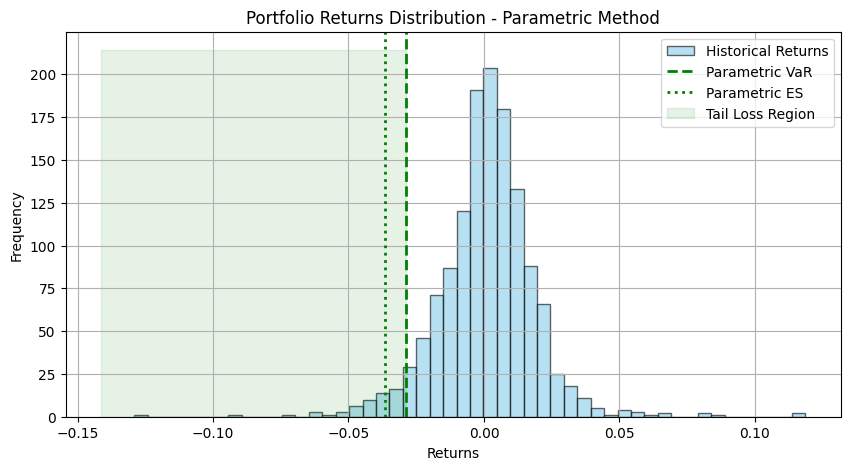

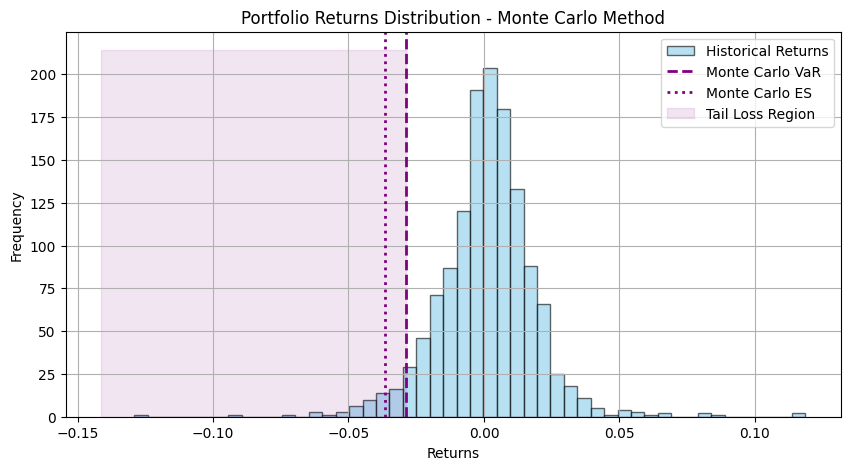

In [25]:
# Historical Method
plt.figure(figsize=(10, 5))
plt.hist(portfolio_returns, bins=50, alpha=0.6, color='skyblue', edgecolor='black', label='Historical Returns')
plt.axvline(var_hist, color='red', linestyle='--', linewidth=2, label='Historical VaR')
plt.axvline(es_hist, color='red', linestyle=':', linewidth=2, label='Historical ES')
plt.fill_betweenx([0, plt.gca().get_ylim()[1]], var_hist, plt.gca().get_xlim()[0], color='red', alpha=0.1, label='Tail Loss Region')
plt.title('Portfolio Returns Distribution - Historical Method')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Parametric Method
plt.figure(figsize=(10, 5))
plt.hist(portfolio_returns, bins=50, alpha=0.6, color='skyblue', edgecolor='black', label='Historical Returns')
plt.axvline(var_param, color='green', linestyle='--', linewidth=2, label='Parametric VaR')
plt.axvline(es_param, color='green', linestyle=':', linewidth=2, label='Parametric ES')
plt.fill_betweenx([0, plt.gca().get_ylim()[1]], var_param, plt.gca().get_xlim()[0], color='green', alpha=0.1, label='Tail Loss Region')
plt.title('Portfolio Returns Distribution - Parametric Method')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Monte Carlo Method
plt.figure(figsize=(10, 5))
plt.hist(portfolio_returns, bins=50, alpha=0.6, color='skyblue', edgecolor='black', label='Historical Returns')
plt.axvline(var_mc, color='purple', linestyle='--', linewidth=2, label='Monte Carlo VaR')
plt.axvline(es_mc, color='purple', linestyle=':', linewidth=2, label='Monte Carlo ES')
plt.fill_betweenx([0, plt.gca().get_ylim()[1]], var_mc, plt.gca().get_xlim()[0], color='purple', alpha=0.1, label='Tail Loss Region')
plt.title('Portfolio Returns Distribution - Monte Carlo Method')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Display the results in a Markdown cell
display(Markdown(f"""
## 📊 Interpretation of Results, Key Insights, and Risk Management Implications

### Interpretation of Results
The results below provide insights into the Value at Risk (VaR) and Expected Shortfall (ES) of the portfolio at a 95% confidence level, based on the actual calculations and methods used in this notebook:

| Method        | VaR (95%)   | ES (95%)   |
|--------------|------------|------------|
| Historical   | {var_hist:.4f} | {es_hist:.4f} |
| Parametric   | {var_param:.4f} | {es_param:.4f} |
| Monte Carlo  | {var_mc:.4f} | {es_mc:.4f} |

#### 1. Value at Risk (VaR)
- **Definition:** VaR estimates the maximum loss the portfolio is expected to incur over a given time horizon (e.g., 1 day), at a 95% confidence level.
- **Results:**
  - **Historical VaR:** {var_hist:.2%}  
    The worst 5% of historical daily returns resulted in losses greater than {abs(var_hist):.2%} of the portfolio value.
  - **Parametric VaR:** {var_param:.2%}  
    Assuming a normal distribution of returns, the maximum loss is approximately {abs(var_param):.2%}.
  - **Monte Carlo VaR:** {var_mc:.2%}  
    Using simulated returns, the portfolio’s maximum expected loss is {abs(var_mc):.2%}.
- **Conclusion:** The VaR values are close across all methods, indicating a consistent risk level regardless of the approach. The parametric and Monte Carlo methods both assume normality, while the historical method is based on actual observed returns.

#### 2. Expected Shortfall (ES)
- **Definition:** ES (or Conditional VaR) measures the average loss beyond the VaR threshold (i.e., in the worst-case scenarios).
- **Results:**
  - **Historical ES:** {es_hist:.2%}  
    If losses exceed the VaR level, the average loss in such cases is {abs(es_hist):.2%}.
  - **Parametric ES:** {es_param:.2%}  
    The parametric ES is calculated using the normal distribution assumption and provides an analytical estimate of tail risk.
  - **Monte Carlo ES:** {es_mc:.2%}  
    Based on simulated returns, the average loss in the worst-case scenarios is {abs(es_mc):.2%}.
- **Conclusion:** The Expected Shortfall is higher than VaR, as expected. ES provides a more conservative measure of risk by focusing on extreme losses beyond the VaR level. The parametric and Monte Carlo ES values are similar, while the historical ES may be higher if there are more extreme losses in the actual data.

### Key Insights
- VaR across methods consistently estimates losses of approximately {abs(var_param):.2%} to {abs(var_hist):.2%} of the portfolio value at a 95% confidence level.
- ES highlights that, in the worst-case scenarios, losses could average up to {abs(es_hist):.2%} (Historical), {abs(es_param):.2%} (Parametric), or {abs(es_mc):.2%} (Monte Carlo).
- **Comparison:**
  - Historical VaR/ES is based on actual observed returns.
  - Monte Carlo simulations use the estimated mean and standard deviation to generate a wide range of possible outcomes.
  - Parametric methods assume normality, which simplifies computations but may underestimate risk if returns are not normally distributed.

### Risk Management Implications
- **If managing a portfolio worth $1,000,000:**
  - **VaR:** The potential loss over 1 day at a 95% confidence level is approximately ${abs(var_param)*1_000_000:,.0f} to ${abs(var_hist)*1_000_000:,.0f}.
  - **ES:** In extreme conditions, the average loss could be up to ${abs(es_hist)*1_000_000:,.0f} (Historical), ${abs(es_param)*1_000_000:,.0f} (Parametric), or ${abs(es_mc)*1_000_000:,.0f} (Monte Carlo).
- **Recommendation:**
  - Rely on Expected Shortfall (ES) for better risk management, as it captures extreme risks better than VaR.
  - Use Monte Carlo simulations for stress testing under uncertain market conditions.
  - Regularly update risk estimates with new data and consider model limitations.

---

**Summary:**
- The close alignment of VaR and ES across methods suggests the portfolio’s risk profile is stable and not overly sensitive to the choice of risk model. However, ES should be preferred for risk management decisions, as it provides a more comprehensive view of potential extreme losses. Regular monitoring and the use of multiple risk estimation techniques are recommended for robust portfolio risk management.
"""))


## 📊 Interpretation of Results, Key Insights, and Risk Management Implications

### Interpretation of Results
The results below provide insights into the Value at Risk (VaR) and Expected Shortfall (ES) of the portfolio at a 95% confidence level, based on the actual calculations and methods used in this notebook:

| Method        | VaR (95%)   | ES (95%)   |
|--------------|------------|------------|
| Historical   | -0.0276 | -0.0407 |
| Parametric   | -0.0288 | -0.0364 |
| Monte Carlo  | -0.0288 | -0.0364 |

#### 1. Value at Risk (VaR)
- **Definition:** VaR estimates the maximum loss the portfolio is expected to incur over a given time horizon (e.g., 1 day), at a 95% confidence level.
- **Results:**
  - **Historical VaR:** -2.76%  
    The worst 5% of historical daily returns resulted in losses greater than 2.76% of the portfolio value.
  - **Parametric VaR:** -2.88%  
    Assuming a normal distribution of returns, the maximum loss is approximately 2.88%.
  - **Monte Carlo VaR:** -2.88%  
    Using simulated returns, the portfolio’s maximum expected loss is 2.88%.
- **Conclusion:** The VaR values are close across all methods, indicating a consistent risk level regardless of the approach. The parametric and Monte Carlo methods both assume normality, while the historical method is based on actual observed returns.

#### 2. Expected Shortfall (ES)
- **Definition:** ES (or Conditional VaR) measures the average loss beyond the VaR threshold (i.e., in the worst-case scenarios).
- **Results:**
  - **Historical ES:** -4.07%  
    If losses exceed the VaR level, the average loss in such cases is 4.07%.
  - **Parametric ES:** -3.64%  
    The parametric ES is calculated using the normal distribution assumption and provides an analytical estimate of tail risk.
  - **Monte Carlo ES:** -3.64%  
    Based on simulated returns, the average loss in the worst-case scenarios is 3.64%.
- **Conclusion:** The Expected Shortfall is higher than VaR, as expected. ES provides a more conservative measure of risk by focusing on extreme losses beyond the VaR level. The parametric and Monte Carlo ES values are similar, while the historical ES may be higher if there are more extreme losses in the actual data.

### Key Insights
- VaR across methods consistently estimates losses of approximately 2.88% to 2.76% of the portfolio value at a 95% confidence level.
- ES highlights that, in the worst-case scenarios, losses could average up to 4.07% (Historical), 3.64% (Parametric), or 3.64% (Monte Carlo).
- **Comparison:**
  - Historical VaR/ES is based on actual observed returns.
  - Monte Carlo simulations use the estimated mean and standard deviation to generate a wide range of possible outcomes.
  - Parametric methods assume normality, which simplifies computations but may underestimate risk if returns are not normally distributed.

### Risk Management Implications
- **If managing a portfolio worth $1,000,000:**
  - **VaR:** The potential loss over 1 day at a 95% confidence level is approximately $28,849 to $27,558.
  - **ES:** In extreme conditions, the average loss could be up to $40,736 (Historical), $36,411 (Parametric), or $36,449 (Monte Carlo).
- **Recommendation:**
  - Rely on Expected Shortfall (ES) for better risk management, as it captures extreme risks better than VaR.
  - Use Monte Carlo simulations for stress testing under uncertain market conditions.
  - Regularly update risk estimates with new data and consider model limitations.

---

**Summary:**
- The close alignment of VaR and ES across methods suggests the portfolio’s risk profile is stable and not overly sensitive to the choice of risk model. However, ES should be preferred for risk management decisions, as it provides a more comprehensive view of potential extreme losses. Regular monitoring and the use of multiple risk estimation techniques are recommended for robust portfolio risk management.


# 🌟 Final Conclusion & Improvements Over the R Project

This Python project not only replicates the core findings of the original R-based VaR and ES analysis ([see R project](https://rpubs.com/Jebin1999/1257473)), but also enhances the overall risk assessment process in several key ways:

- **Reproducibility & Automation:**  
  The Python implementation leverages automated data fetching from Yahoo Finance, ensuring that the analysis always uses the most up-to-date market data. This is a significant improvement over the static data approach in the R project, making the results more relevant and reproducible.

- **Expanded Visualization:**  
  The notebook introduces more informative and visually appealing plots, including color-coded VaR and ES lines, shaded tail risk regions, and combined overlays for direct method comparison. This provides clearer insights into risk profiles and tail events than the original R visualizations.

- **Comprehensive Method Comparison:**  
  All three methodologies—Historical Simulation, Parametric (Variance-Covariance), and Monte Carlo Simulation—are implemented side by side, with results summarized in a unified table and interpreted in detail. This comparative approach helps users understand the strengths and limitations of each method more intuitively.

- **Parametric (Variance-Covariance) vs. Parametric (Gaussian):**  
  Unlike the R project, which uses a Parametric (Gaussian) approach, this notebook employs the Parametric (Variance-Covariance) method. The Variance-Covariance approach is more flexible, as it can be extended to portfolios with multiple assets and can incorporate correlations between assets, making it more suitable for real-world portfolio risk analysis. The Gaussian method, as used in the R project, is typically limited to single-asset or uncorrelated scenarios and may underestimate risk in diversified portfolios.

- **Enhanced Interpretation & Risk Management Insights:**  
  The Python notebook offers a richer narrative around the results, including practical risk management implications, recommendations for using ES over VaR, and guidance on model risk and stress testing. This goes beyond the technical focus of the R project, making the analysis more actionable for practitioners.

- **Modern Python Ecosystem:**  
  By utilizing widely adopted Python libraries (numpy, pandas, matplotlib, yfinance, scipy), the project is accessible, extensible, and easy to integrate into broader analytics pipelines—an advantage over the more specialized R environment.

**In summary:**  
The Python translation not only faithfully reproduces the R project's results but also elevates the analysis with dynamic data, improved visualizations, a more robust parametric method, and deeper practical insights. This makes the project a robust, user-friendly, and future-proof tool for financial risk assessment using VaR and ES methodologies.